<a href="https://colab.research.google.com/github/Shiladitya56/Machine-Learning/blob/main/test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Shiladitya 2348556**

In [99]:
#importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import seaborn as sb
from sklearn.utils import resample
from scipy import stats
from sklearn.preprocessing import MinMaxScaler as scaler
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import train_test_split as tts
from sklearn.decomposition import PCA

In [100]:
#reading the dataset
df = pd.read_csv('/content/drive/MyDrive/ipynb/datasets/churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [101]:
#dropping irrelevant columns
df.drop(['CustomerId', 'RowNumber', 'Surname'],axis=1,inplace=True)

In [102]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [103]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [104]:
#observe that there are no null values
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [105]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

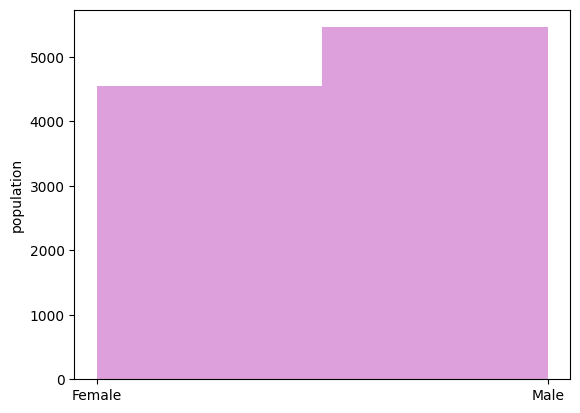

In [106]:
pt.hist(df['Gender'], bins=2, color='plum')
pt.ylabel('population')
pt.show()

Gender does not need any further change.

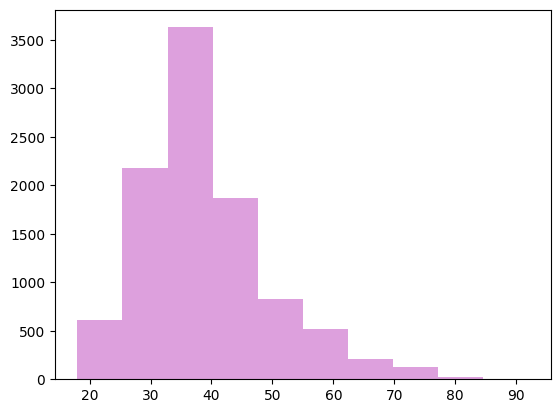

In [107]:
pt.hist(df['Age'], color='plum');

In [108]:
d = df['Geography'].value_counts()
d

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

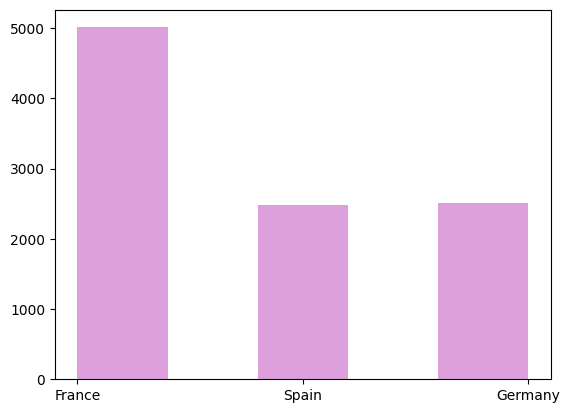

In [109]:
pt.hist(df['Geography'], bins=5, color='plum');

We see that there are more reports from France alone.

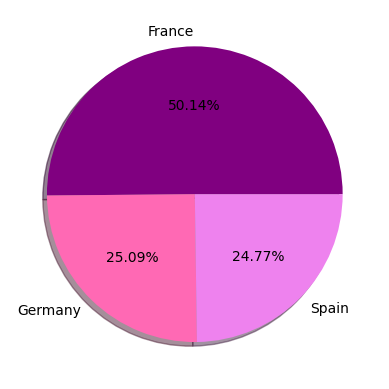

In [110]:
pt.pie(df['Geography'].value_counts(), colors=['purple','hotpink','violet'], shadow=True,
       labels=['France','Germany','Spain'],
       autopct='%1.2f%%');

Almost $50%$ of the dataset is dominated by France. One possible explanation of this could be that there are more branches (and thus customers) of this Bank in France. But since we do not have any provision to verify our claim, we would rather have an even distribution.

In [111]:
a = len(df[(df['Geography']=='France') & (df['Exited']==1)])
b = len(df[(df['Geography']=='Germany') & (df['Exited']==1)])
c = len(df[(df['Geography']=='Spain') & (df['Exited']==1)])
print('Exited from France',a,'which is',a/d[0]*100,'%')
print('Exited from Germany',b,'which is',b/d[1]*100,'%')
print('Exited from Spain',c,'which is',c/d[2]*100,'%')

Exited from France 810 which is 16.15476665337056 %
Exited from Germany 814 which is 32.44320446392985 %
Exited from Spain 413 which is 16.673395236172787 %


In [112]:
df_other = df[df['Geography']!='France']
len(df_other)

4986

In [113]:
df_france = df[df['Geography']=='France']
len(df_france)

5014

In [114]:
df_france = resample(df_france, replace=False,
                     n_samples=int(np.mean([len(df[df['Geography']=='Germany']),len(df[df['Geography']=='Spain'])])))
len(df_france)

2493

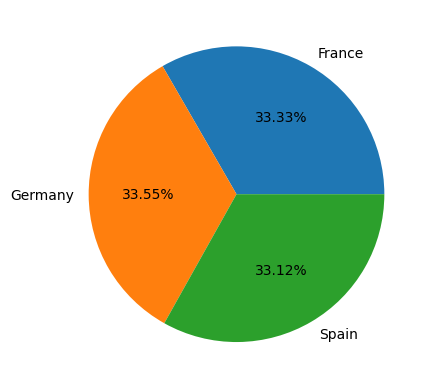

In [115]:
df = pd.concat([df_other,df_france])
df.groupby('Geography').size().plot(kind='pie', autopct='%1.2f%%');

Now the dataset has been adjusted to have almost equal proportion of reports from all the three countries.

In [116]:
g = df['HasCrCard'].value_counts()
g

1    5283
0    2196
Name: HasCrCard, dtype: int64

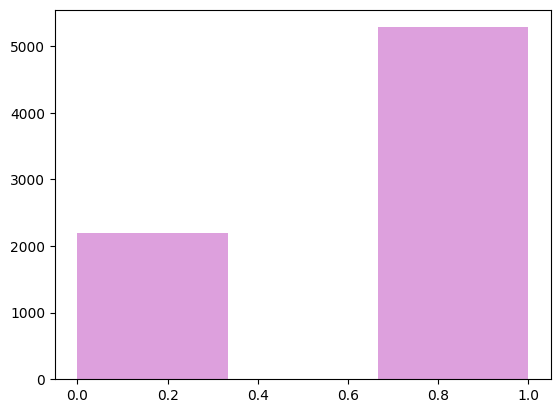

In [117]:
pt.hist(df['HasCrCard'], bins=3, color='plum');

There is a significant difference of customers who have a credit card with the Bank against those who do not. It may be tempting to resample this immediately but we would keep it this way for reasons as explored under..

In [118]:
e = len(df[(df['HasCrCard']==1) & (df['Exited']==1)])
f = len(df[(df['HasCrCard']==0) & (df['Exited']==1)])
print('Exited having a credit card is',e,'which is',e/g[0]*100,'%')
print('Exited without having a credit card is',f,'which is',f/g[1]*100,'%')

Exited having a credit card is 1141 which is 51.95810564663024 %
Exited without having a credit card is 480 which is 9.085746734809767 %


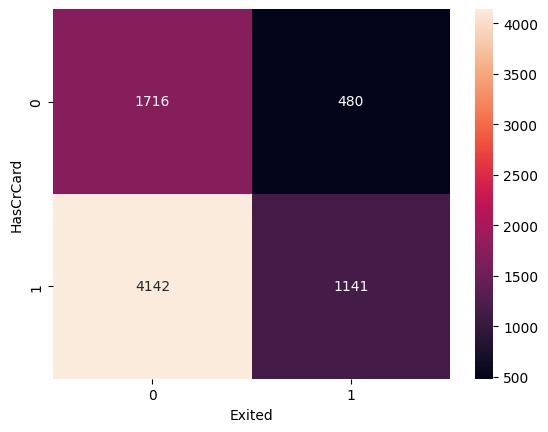

In [119]:
sb.heatmap(pd.crosstab(df['HasCrCard'], df['Exited']), annot=True, fmt='g'); #the fmt parameter is used to format
                                                                             #the annotations from scientific
                                                                             #notation to integers.

Thus we see that there is a high probability that anyone who has a credit card will exit. This may be pointing to some important observation that there may be some issue with the credit card. We will let these values remain..

In [120]:
h = df['IsActiveMember'].value_counts()
h

1    3863
0    3616
Name: IsActiveMember, dtype: int64

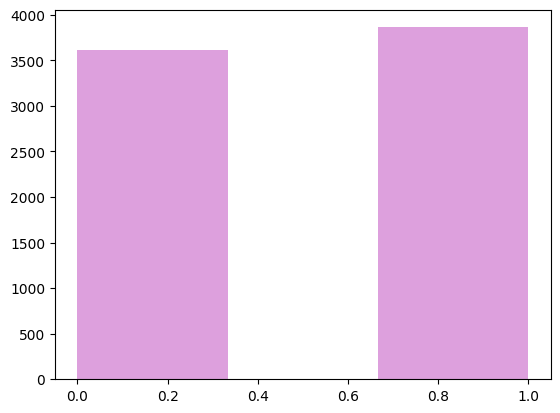

In [121]:
pt.hist(df['IsActiveMember'], bins=3, color='plum');

In [122]:
i = len(df[(df['IsActiveMember']==1)&(df['Exited']==1)])
j = i = len(df[(df['IsActiveMember']==0)&(df['Exited']==1)])
print('Exited being an Active member',i,'which is',i/h[0]*100,'%')
print('Exited not being an Active member',j,'which is',j/h[1]*100,'%')

Exited being an Active member 1035 which is 28.622787610619472 %
Exited not being an Active member 1035 which is 26.792648200880144 %


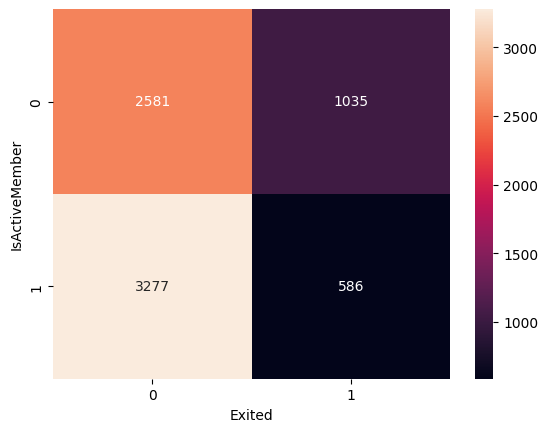

In [123]:
sb.heatmap(pd.crosstab(df['IsActiveMember'], df['Exited']), annot=True, fmt='g');

In [124]:
pd.crosstab([df['Geography'],df['Gender'],df['HasCrCard']], df['Exited'])

Exited                        0    1
Geography Gender HasCrCard          
France    Female 0          265   64
                 1          612  156
          Male   0          349   44
                 1          873  130
Germany   Female 0          219  131
                 1          526  317
          Male   0          262  106
                 1          688  260
Spain     Female 0          244   74
                 1          614  157
          Male   0          377   61
                 1          829  121

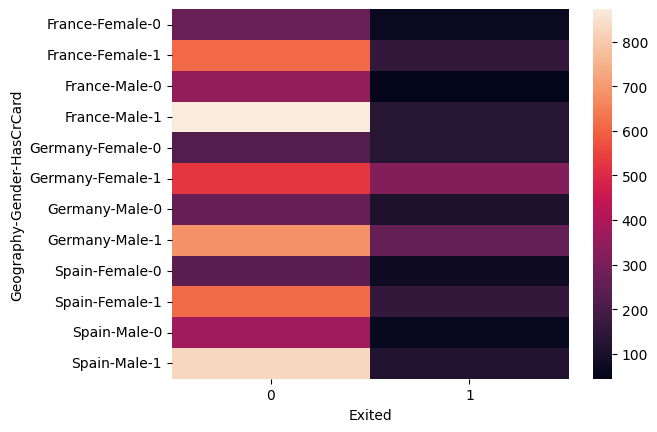

In [125]:
sb.heatmap(pd.crosstab([df['Geography'],df['Gender'],df['HasCrCard']], df['Exited']));

The above reports show some interesting pattern. For example, French men with a credit card seem to have some common (perhaps) serious issue with the bank because there is a high number of customer losses in this particular category.

In [126]:
df['Tenure'].value_counts()

2     798
1     774
5     774
8     772
3     770
7     749
4     738
9     720
6     702
10    368
0     314
Name: Tenure, dtype: int64

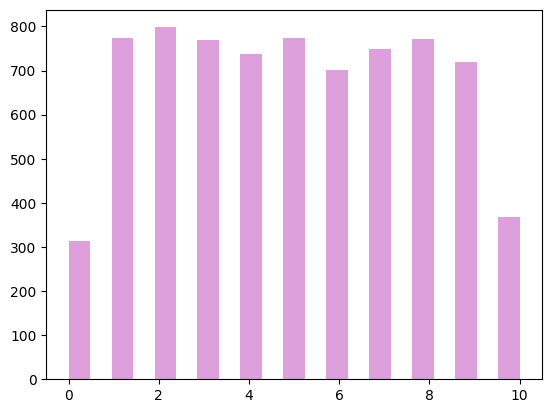

In [127]:
pt.hist(df['Tenure'],bins=21,color='plum');

The number of samples in extreme tenures is significantly lower than the others. We will upsample it.

In [128]:
df_ten = df[(df['Tenure']==0) | (df['Tenure']==10)]
df_others = df[(df['Tenure']!=0) | (df['Tenure']!=10)]

In [129]:
df_ten['Tenure'].value_counts()

10    368
0     314
Name: Tenure, dtype: int64

In [130]:
df_ten = resample(df_ten, replace=True, n_samples = 400)

In [131]:
df = pd.concat([df_ten, df_others])

In [132]:
df['Tenure'].value_counts()

2     798
1     774
5     774
8     772
3     770
7     749
4     738
9     720
6     702
10    598
0     484
Name: Tenure, dtype: int64

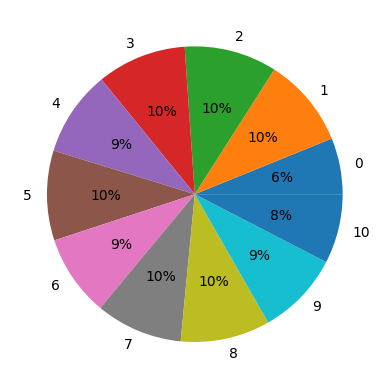

In [133]:
df.groupby('Tenure').size().plot(kind='pie', autopct='%1.0f%%');

This seems fine now.

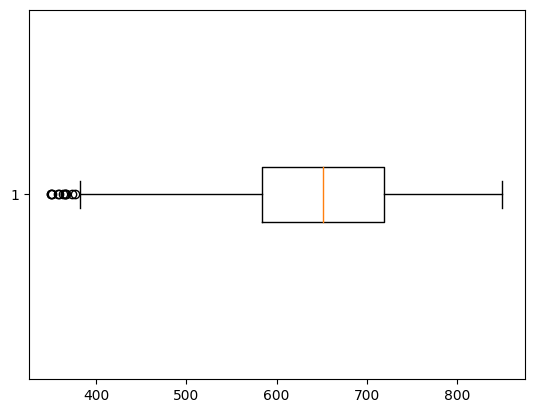

In [134]:
#outliers (also least relevant data points in this case) are seen to the
#left of the 400 mark.
pt.boxplot(df['CreditScore'], vert=0);

In [135]:
df = df[df['CreditScore']>=390]

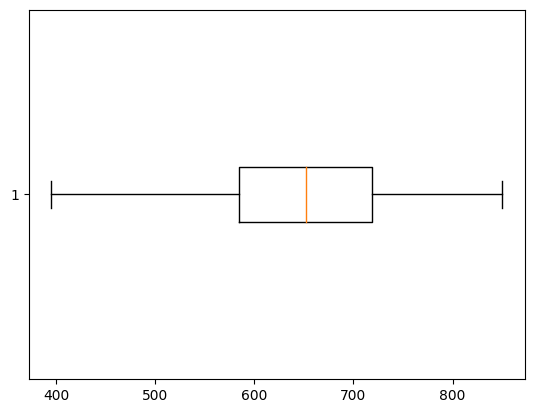

In [136]:
pt.boxplot(df['CreditScore'], vert=0);

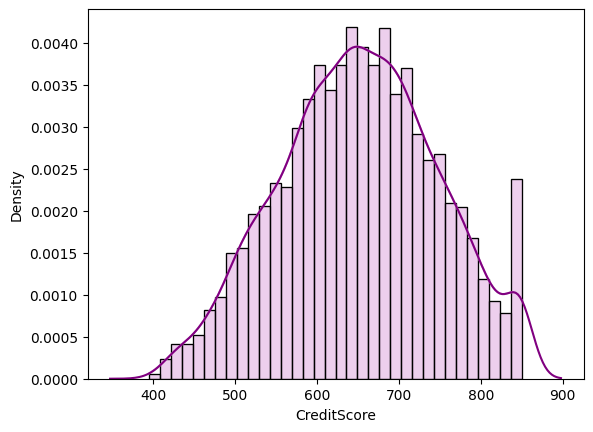

In [137]:
sb.histplot(df['CreditScore'], kde=True, color='plum', stat='density')
sb.kdeplot(df['CreditScore'], color='purple');

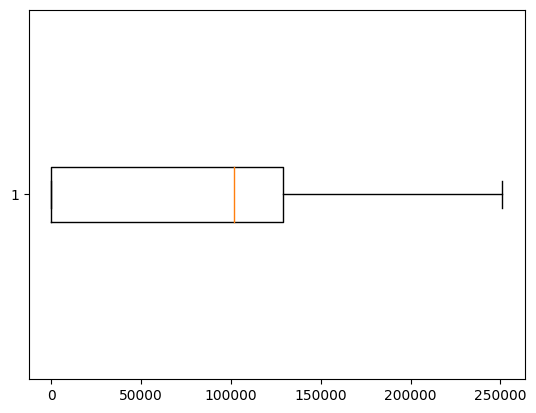

In [138]:
pt.boxplot(df['Balance'], vert=0); #shows negative skewness

This plot shows high negative skewness..

In [139]:
df['Balance'].skew()

-0.2897764471369712

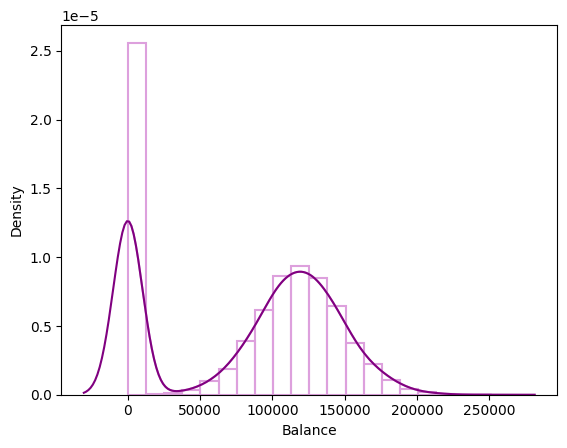

In [140]:
sb.histplot(df['Balance'], kde=True, color='plum', stat='density', fill=False)
sb.kdeplot(df['Balance'], color='purple');

We need to balance the above plot.

In [141]:
a1 = len(df[df['Balance']==0])
b1 = len(df['Balance'])
print("%.2f" %(a1/b1*100),'% of the data has 0 Balance.')

32.10 % of the data has 0 Balance.


In [142]:
df = df[df['Balance']!=0]

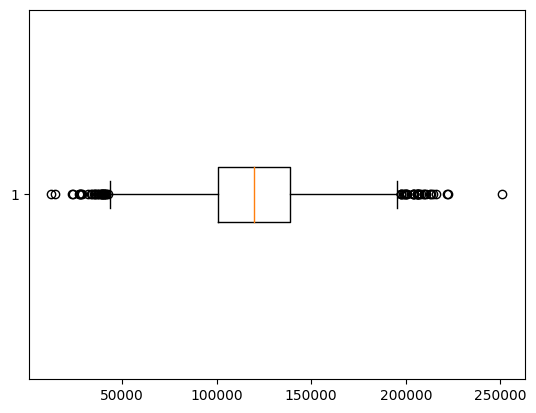

In [143]:
pt.boxplot(df['Balance'], vert=0);

Trivial but an interesting condition where the extreme datapoints are not outliers.

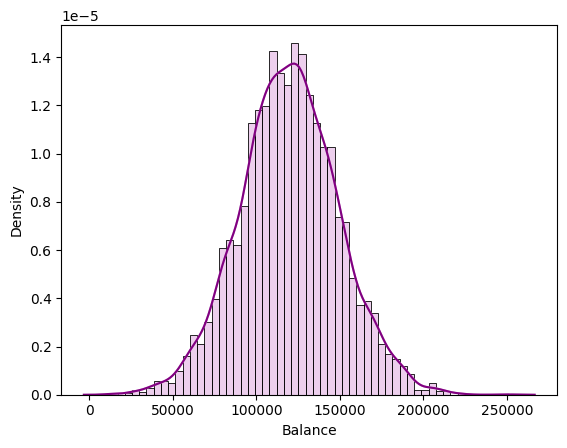

In [144]:
sb.histplot(df['Balance'], kde=True, color='plum', stat='density')
sb.kdeplot(df['Balance'], color='purple');

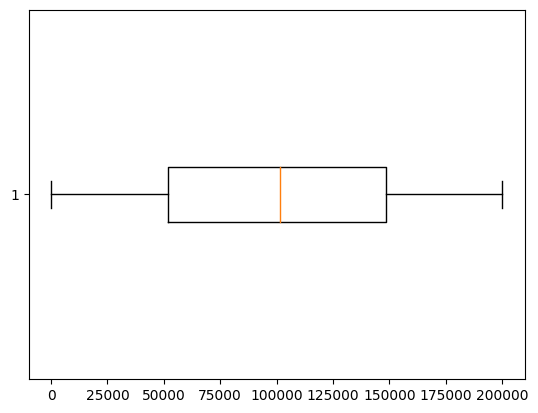

In [145]:
pt.boxplot(df['EstimatedSalary'], vert=0);

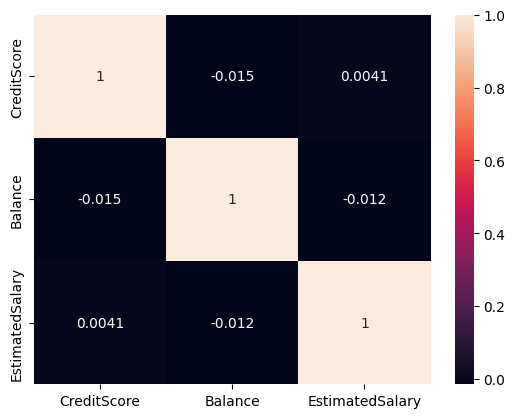

In [146]:
corr = df[['CreditScore','Balance','EstimatedSalary']]
corr = corr.corr()
sb.heatmap(corr, annot=True);

There is no remarkable dependence to address.

In [147]:
df['NumOfProducts'].value_counts()

1    3405
2    1751
3     143
4      41
Name: NumOfProducts, dtype: int64

In [148]:
pd.crosstab(df['NumOfProducts'], df['Exited'])

Exited,0,1
NumOfProducts,,
1,2458,947
2,1522,229
3,10,133
4,0,41


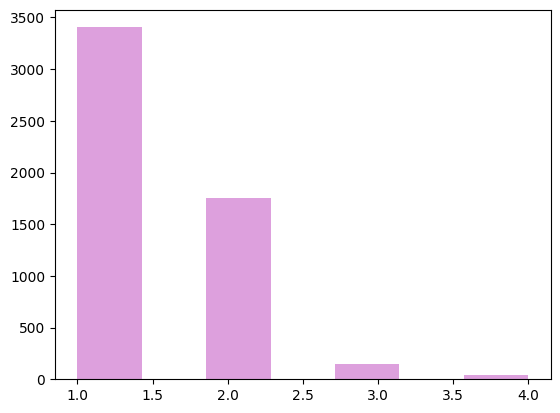

In [149]:
pt.hist(df['NumOfProducts'], bins=7, color='plum');

Interestingly, anyone with $4$ `NumberOfProducts` has always exited. And moreover, the number of cases are relatively too less.

So we will just drop it.

In [150]:
df.drop(df[df['NumOfProducts']==4].index, inplace=True)

In [151]:
df['NumOfProducts'].value_counts()

1    3405
2    1751
3     143
Name: NumOfProducts, dtype: int64

In [152]:
#split into independent and dependent variables from here
x = df.iloc[:,0:10]
y = df.iloc[:,10]

In [153]:
x.shape

(5299, 10)

In [154]:
#finding the correlation
df_corr = df.corr(numeric_only=True)
df_corr

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.007312,0.010192,-0.016520,0.003989,-0.028129,0.033726,0.004836,-0.021438
Age,-0.007312,1.000000,-0.005355,-0.005231,-0.022769,-0.026523,0.059512,-0.013569,0.297268
Tenure,0.010192,-0.005355,1.000000,0.008242,0.024471,0.035372,-0.054722,0.005711,-0.017728
Balance,-0.016520,-0.005231,0.008242,1.000000,0.001412,0.025728,-0.006078,-0.011584,0.013753
NumOfProducts,0.003989,-0.022769,0.024471,0.001412,1.000000,0.003639,-0.001601,0.028056,-0.006652
HasCrCard,-0.028129,-0.026523,0.035372,0.025728,0.003639,1.000000,-0.018778,0.010339,-0.007124
IsActiveMember,0.033726,0.059512,-0.054722,-0.006078,-0.001601,-0.018778,1.000000,-0.011329,-0.175440
EstimatedSalary,0.004836,-0.013569,0.005711,-0.011584,0.028056,0.010339,-0.011329,1.000000,-0.000846
Exited,-0.021438,0.297268,-0.017728,0.013753,-0.006652,-0.007124,-0.175440,-0.000846,1.000000


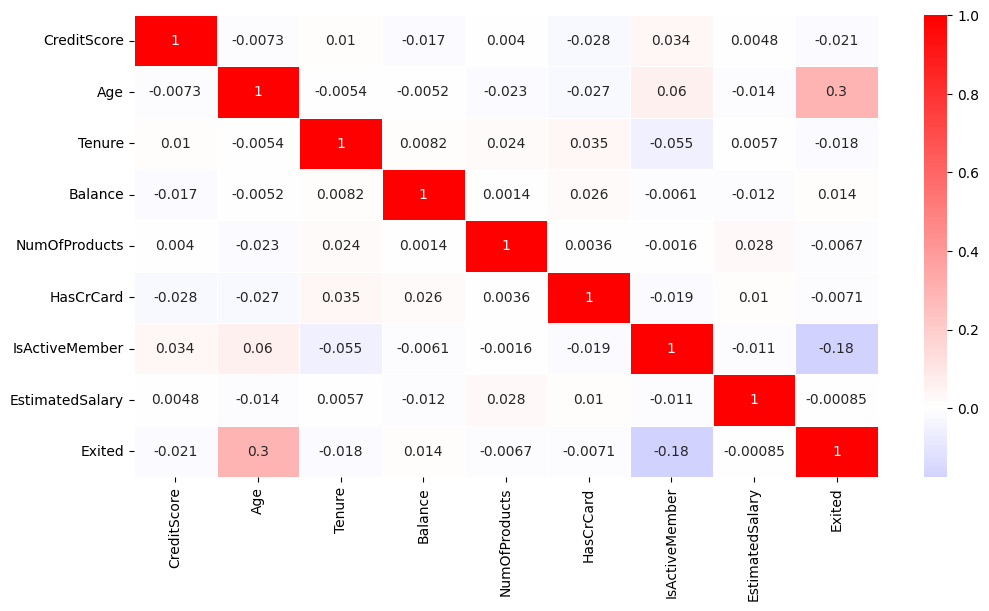

In [155]:
#a quick visual of the correlation matrix
fig,ax = pt.subplots(figsize=(12,6))
sb.heatmap(df_corr, annot=True, linewidths=0.5, center=0, cmap='bwr')
pt.show()

`Age` shows relatively high correlation with exited. We will cross verify this using `LogisticRegression` below..

In [156]:
#first let us scale the data
scale = scaler()
x[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']] = \
scale.fit_transform(x[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']])

In [157]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
8962,0.641758,France,Male,0.270270,0.0,0.553565,1,0,1,0.686466
1359,0.079121,France,Male,0.256757,0.0,0.454225,1,1,1,0.585177
5374,0.463736,Spain,Female,0.067568,1.0,0.243075,1,0,1,0.454515
886,0.756044,Spain,Male,0.270270,0.0,0.486109,1,1,0,0.063937
5136,0.707692,Germany,Female,0.621622,1.0,0.360273,2,1,1,0.108115
...,...,...,...,...,...,...,...,...,...,...
5018,0.353846,France,Female,0.445946,0.8,0.205063,1,1,0,0.994198
3498,0.639560,France,Female,0.310811,0.7,0.585669,2,0,1,0.661949
7241,0.276923,France,Male,0.256757,0.5,0.391648,2,1,1,0.424570
3586,0.947253,France,Male,0.500000,0.4,0.431250,1,1,0,0.700716


In [158]:
#and encode the categories to numbers
x = pd.get_dummies(x, columns=['Geography', 'Gender'])
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
8962,0.641758,0.270270,0.0,0.553565,1,0,1,0.686466,1,0,0,0,1
1359,0.079121,0.256757,0.0,0.454225,1,1,1,0.585177,1,0,0,0,1
5374,0.463736,0.067568,1.0,0.243075,1,0,1,0.454515,0,0,1,1,0
886,0.756044,0.270270,0.0,0.486109,1,1,0,0.063937,0,0,1,0,1
5136,0.707692,0.621622,1.0,0.360273,2,1,1,0.108115,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5018,0.353846,0.445946,0.8,0.205063,1,1,0,0.994198,1,0,0,1,0
3498,0.639560,0.310811,0.7,0.585669,2,0,1,0.661949,1,0,0,1,0
7241,0.276923,0.256757,0.5,0.391648,2,1,1,0.424570,1,0,0,0,1
3586,0.947253,0.500000,0.4,0.431250,1,1,0,0.700716,1,0,0,0,1


In [159]:
#split into training and testing sets with 75% of the data saved for training
x_train, x_test, y_train, y_test = tts(x,y,test_size=0.25)

We will see the most important features...

In [160]:
model = LR();
model.fit(x_train, y_train);

In [161]:
model.coef_

array([[-0.07069892,  4.81601605, -0.30484822,  0.54878031, -0.13470214,
        -0.05824714, -0.95638772, -0.06387097, -0.26660585,  0.48930847,
        -0.22355123,  0.25338115, -0.25422975]])

In [162]:
model.coef_.shape

(1, 13)

In [163]:
imp = pd.DataFrame(data={'Att': x_train.columns,'Imp': model.coef_[0]})
imp = imp.sort_values(by='Imp', ascending=False)

In [164]:
imp

,Att,Imp
1,Age,4.816016
3,Balance,0.548780
9,Geography_Germany,0.489308
11,Gender_Female,0.253381
5,HasCrCard,-0.058247
7,EstimatedSalary,-0.063871
0,CreditScore,-0.070699
4,NumOfProducts,-0.134702
10,Geography_Spain,-0.223551
12,Gender_Male,-0.254230


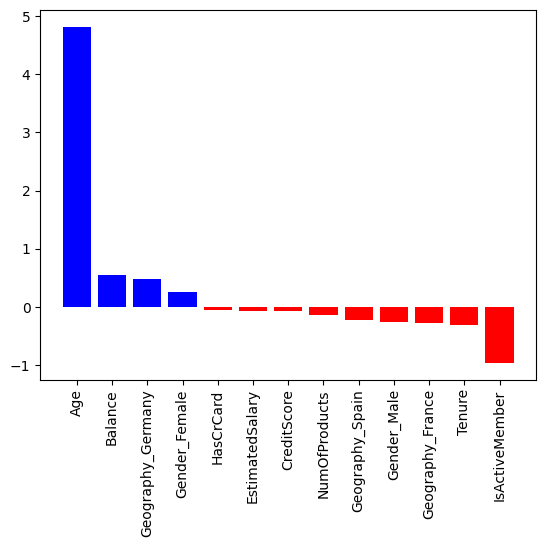

In [165]:
pt.bar(x=imp['Att'], height=imp['Imp'], color=['red' if i<0 else 'blue' for i in imp['Imp']])
pt.xticks(rotation='vertical')
pt.show();

: )

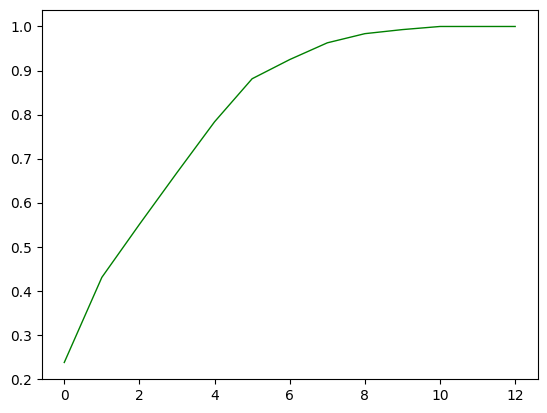

In [166]:
pca = PCA().fit(x_train)
pt.plot(pca.explained_variance_ratio_.cumsum(), lw=1, color='green')
pt.show()

Clearly, there does not seem to be a need to reduce the dimension from here as the top features do not capture any major variance.

In [167]:
x.drop(['Tenure'], axis=1, inplace=True)

###The Final Train Set

In [168]:
x

,CreditScore,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
8962,0.641758,0.270270,0.553565,1,0,1,0.686466,1,0,0,0,1
1359,0.079121,0.256757,0.454225,1,1,1,0.585177,1,0,0,0,1
5374,0.463736,0.067568,0.243075,1,0,1,0.454515,0,0,1,1,0
886,0.756044,0.270270,0.486109,1,1,0,0.063937,0,0,1,0,1
5136,0.707692,0.621622,0.360273,2,1,1,0.108115,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5018,0.353846,0.445946,0.205063,1,1,0,0.994198,1,0,0,1,0
3498,0.639560,0.310811,0.585669,2,0,1,0.661949,1,0,0,1,0
7241,0.276923,0.256757,0.391648,2,1,1,0.424570,1,0,0,0,1
3586,0.947253,0.500000,0.431250,1,1,0,0.700716,1,0,0,0,1


😃

